# Exam 2020

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as smp

sns.set(rc={'figure.figsize':(12, 12)})

In [3]:
path = 'PreviousExams/data/aireMadrid.csv' # Change
aireMadrid = pd.read_csv(path)
aireMadrid.head()

,estacion,magnitud,mes,dia,medicion,lluvia_mm
0,4,1,1,1,18.0,0.0
1,4,1,1,2,20.0,0.0
2,4,1,1,3,18.0,0.0
3,4,1,1,4,19.0,0.0
4,4,1,1,5,18.0,0.0


## Exercise 1

#### C1
**How many observations are in the table? How many variables?**

In [5]:
aireMadrid.shape

(26691, 6)

There are 26691 observations and 6 variables

#### C2
**Is there missing data? what type of variables are they? To begin to understand the structure of the data
data do some preliminary exploration of the data. In particular, make a table of magnitude vs. station (the table is large). You will see that we do not have measurements of all magnitudes for all stations.**

In [9]:
data_na =  aireMadrid.isna()
data_na.sum()

estacion     0
magnitud     0
mes          0
dia          0
medicion     0
lluvia_mm    0
dtype: int64

It seems like there is no missing data

In [8]:
aireMadrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26691 entries, 0 to 26690
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estacion   26691 non-null  int64  
 1   magnitud   26691 non-null  int64  
 2   mes        26691 non-null  int64  
 3   dia        26691 non-null  int64  
 4   medicion   26691 non-null  float64
 5   lluvia_mm  26691 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.2 MB


The estacion variable is an integer. However, since it is an id, it is best considered as categorical. The same thing happens for the magnitud variable, the month and the day. The medicion and the lluvia_mm are numerical.

In [15]:
data_objects = aireMadrid.columns[data.dtypes == 'int64']
aireMadrid[data_objects] = aireMadrid[data_objects].astype('category', )
aireMadrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26691 entries, 0 to 26690
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   estacion   26691 non-null  category
 1   magnitud   26691 non-null  category
 2   mes        26691 non-null  category
 3   dia        26691 non-null  category
 4   medicion   26691 non-null  float64 
 5   lluvia_mm  26691 non-null  float64 
dtypes: category(4), float64(2)
memory usage: 524.5 KB


In [16]:
pd.crosstab(aireMadrid.estacion, aireMadrid.magnitud)

magnitud,1,6,7,8,9,10,12,14,20,30,35,42,43,44
estacion,,,,,,,,,,,,,,
4,217,217,217,217,0,0,217,0,0,0,0,0,0,0
8,155,155,155,155,155,155,155,155,124,124,124,155,155,155
11,0,0,217,217,0,0,217,0,186,186,186,0,0,0
16,0,217,217,217,0,0,217,217,0,0,0,0,0,0
17,186,0,186,186,0,0,186,155,0,0,0,0,0,0
18,155,155,155,155,0,93,155,124,186,186,186,0,0,0
24,217,217,217,217,186,186,217,217,155,155,155,217,217,217
27,0,0,217,217,0,0,217,186,0,0,0,0,0,0
35,124,186,186,186,0,0,186,186,0,0,0,0,0,0


#### C3
**Think about the structure of the table and how the information is coded. To guide you in
for example, analyze whether the sulfur dioxide measurements (magnitude 1) follow a normal distribution (make a graphical analysis, including the ozone data from all stations).**

**Is the data in the table clean (tidy) data? Attention: you are not asked to transform them into clean data, but to say whether they are clean or not.**

In [17]:
so2 = aireMadrid[aireMadrid.magnitud == 1]
so2

,estacion,magnitud,mes,dia,medicion,lluvia_mm
0,4,1,1,1,18.0,0.0
1,4,1,1,2,20.0,0.0
2,4,1,1,3,18.0,0.0
3,4,1,1,4,19.0,0.0
4,4,1,1,5,18.0,0.0
...,...,...,...,...,...,...
23648,57,1,7,27,5.0,0.0
23649,57,1,7,28,5.0,0.0
23650,57,1,7,29,5.0,0.0
23651,57,1,7,30,5.0,0.0


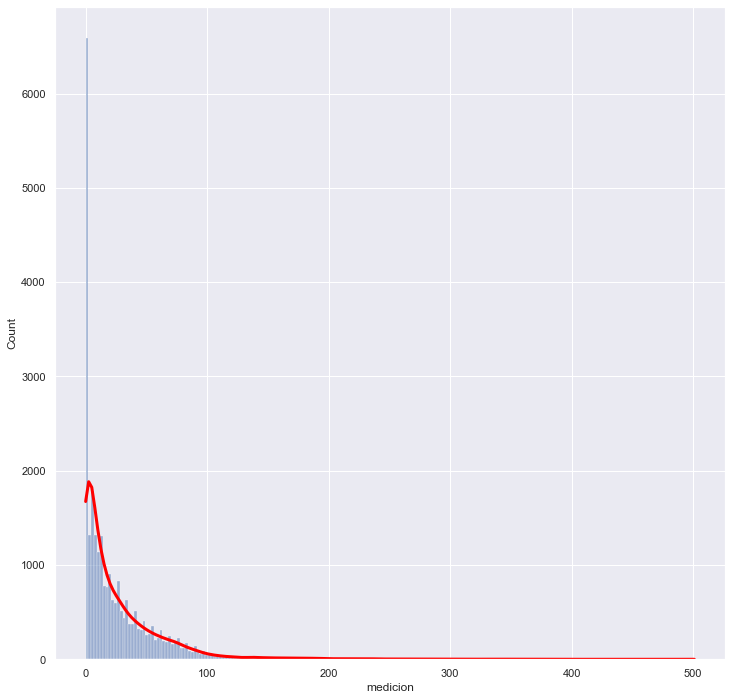

In [19]:
dens_plot = sns.histplot(data = aireMadrid, x = 'medicion', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

The distribution is clearly not normal

The data is not tidy because the 'medicion' variable references different meassures depending on the 'magnitude'

## Exercise 2

#### C4
Add a rain factor to the table depending on whether it rained that day or not. It is considered to have rained if the value
of the variable rain_mm is not zero. Make a relative frequency table for this factor. What probability are these values estimating?
(Be careful, it is not the probability that it rained on a random day).

In [20]:
aireMadrid["lluvia"] = aireMadrid.lluvia_mm > 0

In [21]:
aireMadrid.head()

,estacion,magnitud,mes,dia,medicion,lluvia_mm,lluvia
0,4,1,1,1,18.0,0.0,False
1,4,1,1,2,20.0,0.0,False
2,4,1,1,3,18.0,0.0,False
3,4,1,1,4,19.0,0.0,False
4,4,1,1,5,18.0,0.0,False


In [23]:
aireMadrid.lluvia.value_counts(normalize=True)

False    0.828144
True     0.171856
Name: lluvia, dtype: float64

In [24]:
aireMadrid[["mes", "dia"]].value_counts()

mes  dia
5    30     144
     31     144
     1      144
     2      144
     3      144
           ... 
8    6       99
     5       99
     4       99
     3       99
     2       99
Length: 217, dtype: int64

Since several meassures can be taken on the same day, it is the probability that if you draw a random sample from the dataset, that day it rained.

#### C5
**Sulfur dioxide (magnitude 1) has only been measured at a few stations in the network. Calculate the
average value of the sulfur dioxide measurements at each of these stations depending on whether it rained or not.
What conclusion do you draw?**

In [31]:
so2 = aireMadrid[aireMadrid.magnitud == 1]
so2.head()

,estacion,magnitud,mes,dia,medicion,lluvia_mm,lluvia
0,4,1,1,1,18.0,0.0,False
1,4,1,1,2,20.0,0.0,False
2,4,1,1,3,18.0,0.0,False
3,4,1,1,4,19.0,0.0,False
4,4,1,1,5,18.0,0.0,False


In [35]:
so2.groupby(['estacion', 'lluvia']).medicion.mean()

estacion  lluvia
4         False      9.044693
          True       7.973684
8         False      8.793651
          True       6.137931
11        False           NaN
          True            NaN
16        False           NaN
          True            NaN
17        False      8.644737
          True       7.970588
18        False      9.992308
          True       6.800000
24        False      4.720670
          True       4.631579
27        False           NaN
          True            NaN
35        False     12.798077
          True      10.100000
36        False      9.803030
          True       6.782609
38        False     11.269841
          True      10.620690
39        False           NaN
          True            NaN
40        False      9.602649
          True       8.485714
47        False           NaN
          True            NaN
48        False           NaN
          True            NaN
49        False           NaN
          True            NaN
50        False        

The average of meassurements of so2 are higher when there is no rain for every station

#### C6
**What is the probability that a measurement from the table chosen at random corresponds to nitrogen monoxide (magnitude 7)? Knowing that one measurement corresponds to nitrogen monoxide,
what is the probability that it comes from station 24?
Use these values to calculate the probability that a randomly chosen measurement is for nitrogen monoxide and was taken at station 24?
Check the result by directly calculating that probability.**

Probability that a random sample corresponds to nitrogen monoxide

In [49]:
no = aireMadrid[aireMadrid.magnitud == 7]
p_no = len(no)/len(aireMadrid)
p_no

0.17305458768873402

Probability that a random sample corresponds to station 24 given that the magnitude is nitrogen monoxide

In [50]:
p_24_given_no = sum(no.estacion == 24)/len(no)
p_24_given_no

0.04697986577181208

Probability that a random sample is for nitrogen monoxide and was taken at station 24

In [52]:
p_no_24 = p_no*p_24_given_no
p_no_24

0.008130081300813007

Probability that a random sample is for nitrogen monoxide and was taken at station 24, calculated directly

In [48]:
p_no_24 = sum((aireMadrid.magnitud == 7) & (aireMadrid.estacion == 24))/len(aireMadrid)
p_no_24

0.008130081300813009

#### C7
**If we choose 10 measurements at random (and with replacement) from station 49, what is the probability that 3 or more are nitrogen monoxide?**

In [53]:
aireMadrid_49 = aireMadrid[aireMadrid.estacion == 49]
aireMadrid_49.head()

,estacion,magnitud,mes,dia,medicion,lluvia_mm,lluvia
18631,49,7,1,1,31.0,0.0,False
18632,49,7,1,2,62.0,0.0,False
18633,49,7,1,3,27.0,0.0,False
18634,49,7,1,4,57.0,0.0,False
18635,49,7,1,5,90.0,0.0,False


In [56]:
p_no_given_49 = sum(aireMadrid_49.magnitud == 7)/len(aireMadrid_49)
p_no_given_49

0.25

In [57]:
n = 10
r = 3
p = p_no_given_49
stats.binom.pmf(r, n = n, p = p)

0.2502822875976565

The probability is 25.03%

## Exercise 3

#### C8
**Stations 24 (Casa de Campo) and 56 (Plaza Elíptica) represent very different locations.
The former is located in a green area while the latter has high levels of traffic.
It is natural to wonder whether the pollutant levels of these two stations differ. For this
question we will choose as pollutant particles smaller than 10 µm (magnitude 10). Analyze
graphically (with whatever tool you think is most appropriate) whether the location of these stations affects this pollutant**

In [60]:
pol = aireMadrid[(aireMadrid.magnitud == 10) & ((aireMadrid.estacion == 24) | (aireMadrid.estacion == 56))]

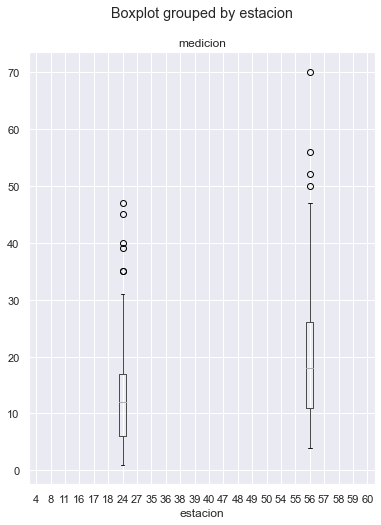

In [61]:
getPlot = pol.boxplot(column='medicion', by = 'estacion', figsize=(6, 8))

The median of the meassurement of particles of magnitude 10 is higher in Plaza Eliptica (station 57) than in casa de Campo (station 24)

#### C9
**Calculate a confidence interval for the mean level of particles smaller than 10 µm (magnitude 10) at the Casa Campo station. Do the same for those at Plaza Elíptica. Do the intervals overlap and what conclusion do you draw?**

In [63]:
aireMadrid_10_24 = aireMadrid[(aireMadrid.magnitud == 10)&(aireMadrid.estacion == 24)]
aireMadrid_10_24.head()

,estacion,magnitud,mes,dia,medicion,lluvia_mm,lluvia
8959,24,10,1,1,26.0,0.0,False
8960,24,10,1,2,21.0,0.0,False
8961,24,10,1,3,17.0,0.0,False
8962,24,10,1,4,23.0,0.0,False
8963,24,10,1,5,24.0,0.0,False


In [65]:
n = len(aireMadrid_10_24)
barX = aireMadrid_10_24.medicion.mean()
s = aireMadrid_10_24.medicion.std()

# Short version of the critical point computation:
cl = 0.95
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval for the mean level of particles smaller than 10 µm (magnitude 10) at the Casa Campo station is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The confidence interval for the mean level of particles smaller than 10 µm (magnitude 10) at the Casa Campo station is  [11.84606906 14.29371589]
Rounded to 4 digits: [11.85, 14.29]


In [64]:
aireMadrid_10_56 = aireMadrid[(aireMadrid.magnitud == 10)&(aireMadrid.estacion == 56)]
aireMadrid_10_56.head()

,estacion,magnitud,mes,dia,medicion,lluvia_mm,lluvia
23095,56,10,1,1,37.0,0.0,False
23096,56,10,1,2,44.0,0.0,False
23097,56,10,1,3,37.0,0.0,False
23098,56,10,1,4,52.0,0.0,False
23099,56,10,1,5,44.0,0.0,False


In [66]:
n = len(aireMadrid_10_56)
barX = aireMadrid_10_56.medicion.mean()
s = aireMadrid_10_56.medicion.std()

# Short version of the critical point computation:
cl = 0.95
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval for the mean level of particles smaller than 10 µm (magnitude 10) at the Casa Campo station is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The confidence interval for the mean level of particles smaller than 10 µm (magnitude 10) at the Casa Campo station is  [18.22654734 21.73474298]
Rounded to 4 digits: [18.23, 21.73]


The intervals do not overlap

### C10

**Haz un contraste de la hipótesis alternativa: el valor medio de las mediciones de partículas de
menos de 10 µm en la estación de Casa de Campo es menor que el de Plaza Elíptica.
Nota: si no sabes hacer el contraste de dos muestras mira la sesión 6 del curso. Si con eso no te aclaras,
alternativamente puedes hacer un contraste de una muestra: calcula la media de las observaciones de
Plaza Elíptica. Llama µ0 a ese valor y contrasta la hipótesis alternativa el valor medio de las mediciones
de partículas de menos de 10 µm en la estación de Casa de Campo es menor que µ0.**


Ho: the mean for Casa de Campo is equal or higher than that of plaza Eliptica


Ha: the mean for Casa de Campo is lower than that of plaza Eliptica

In [71]:
stats.ttest_ind(a=aireMadrid_10_24.medicion, b=aireMadrid_10_56.medicion, equal_var=False, alternative='less')

Ttest_indResult(statistic=-6.332814124498963, pvalue=4.685282659038652e-10)

The p-value is lower than 0.05. Therefore, we can conclude reject the null hypothesis and confirm that the mean for Casa de Campo is lower than that of Plaza Eliptica.

## Exercise 4

#### C11
**Let's make a linear regression model for the two variables:**


**x : level of particles less than 10 µm (magnitude 10)**


**y : level of particles less than 2.5 µm (magnitude 9)**

**In this question we will only use data from station 38 (Cuatro Caminos) because both values were measured at that station.
station the values of both variables were measured on exactly the same days. In order to build the
model it is first necessary to identify the measurements of these two variables corresponding to the
the same day (the two measurements appear in the same column). You can do this in two ways.
The best is to use a tidyR function. If you do this, be sure to adjust the variable names in the table so that they are syntactically correct (numbers do not serve as names). The
names function allows you to examine but also modify the names of a table.
Alternatively, you can take advantage of the fact that the measurement days are the same and appear in the same order.
Thanks to this, you can: (i) split the table in two (one with the x values and the other with the y values), (ii) extract the y values from one of these two tables and (iii) add them to the other.
Whichever method you use, build the model and draw the scatter plot of those variables
along with the obtained regression line**

In [72]:
aireMadrid_38 = aireMadrid[aireMadrid.estacion == 38]
aireMadrid_38.head()

,estacion,magnitud,mes,dia,medicion,lluvia_mm,lluvia
13578,38,1,1,1,20.0,0.0,False
13579,38,1,1,2,18.0,0.0,False
13580,38,1,1,3,14.0,0.0,False
13581,38,1,1,4,17.0,0.0,False
13582,38,1,1,5,17.0,0.0,False


In [81]:
aireMadrid_38_10 = aireMadrid_38[aireMadrid_38.magnitud == 10]
aireMadrid_38_9 = aireMadrid_38[aireMadrid_38.magnitud == 9]

In [82]:
aireMadrid_38_9

,estacion,magnitud,mes,dia,medicion,lluvia_mm,lluvia
14043,38,9,1,1,27.0,0.0,False
14044,38,9,1,2,23.0,0.0,False
14045,38,9,1,3,12.0,0.0,False
14046,38,9,1,4,20.0,0.0,False
14047,38,9,1,5,23.0,0.0,False
...,...,...,...,...,...,...,...
14193,38,9,12,27,13.0,0.0,False
14194,38,9,12,28,21.0,0.0,False
14195,38,9,12,29,16.0,0.0,False
14196,38,9,12,30,22.0,0.0,False


In [95]:
data = aireMadrid_38_10.copy()
data["medicion_y"] = aireMadrid_38_9.medicion.values
data.head()

,estacion,magnitud,mes,dia,medicion,lluvia_mm,lluvia,medicion_y
14198,38,10,1,1,37.0,0.0,False,27.0
14199,38,10,1,2,36.0,0.0,False,23.0
14200,38,10,1,3,24.0,0.0,False,12.0
14201,38,10,1,4,34.0,0.0,False,20.0
14202,38,10,1,5,36.0,0.0,False,23.0


In [96]:
X = data.medicion
Y = data.medicion_y

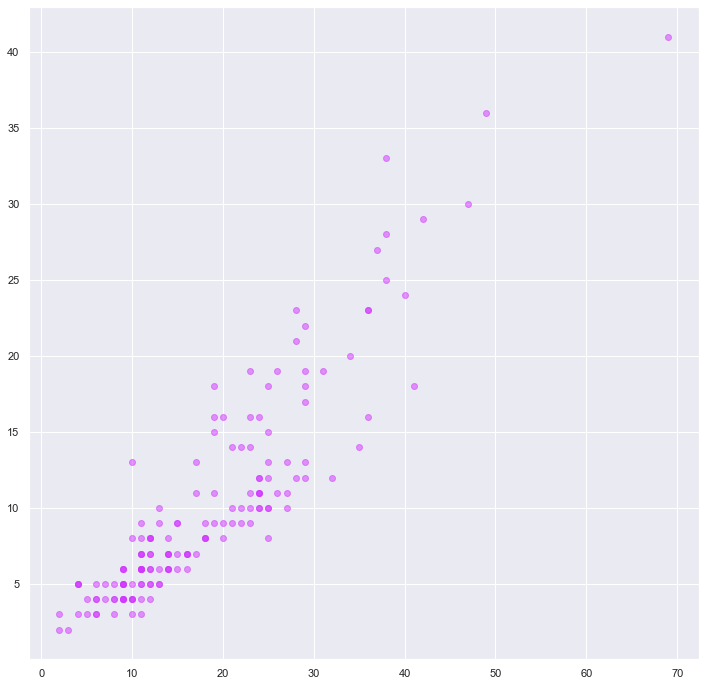

In [100]:
plt.scatter(x = X, y = Y, alpha = 0.5, c = '#d133ff')
plt.show()

In [114]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
X_1 = sm.add_constant(X)
model = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             medicion_y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     710.8
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           2.22e-59
Time:                        00:21:42   Log-Likelihood:                -388.83
No. Observations:                 155   AIC:                             781.7
Df Residuals:                     153   BIC:                             787.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6944      0.476     -1.459      0.146      -1.634       0.246
medicion       0.6014      0.023     26.660      0.000       0.557       0.646
==============================================================================
Omnibus:                        9.618   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.079
Skew:                           0.500   Prob(JB):                      0.00648
Kurtosis:                       3.747   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dispersion diagram

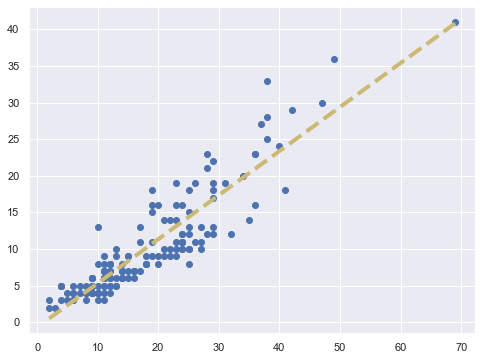

In [116]:
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
fit.pred = fit.get_prediction(X_new)
fit_fitted_new = fit.pred.summary_frame(alpha=0.05)["mean"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X_new[:,1], fit_fitted_new, "y--", lw = 4)

#### C12
**What percentage of the variability in the level of particles smaller than 2.5 µm is explained by the model?
Also examine the diagnostic plots of the model and use them to make a judgment as to whether that
model meets the linear model assumptions.**

The variance explained is r2 = 0.823

In [117]:
%run ./code/Linear_Reg_Diagnostic.py
fit_diagnose = Linear_Reg_Diagnostic(fit)

Residual vs fitted plot

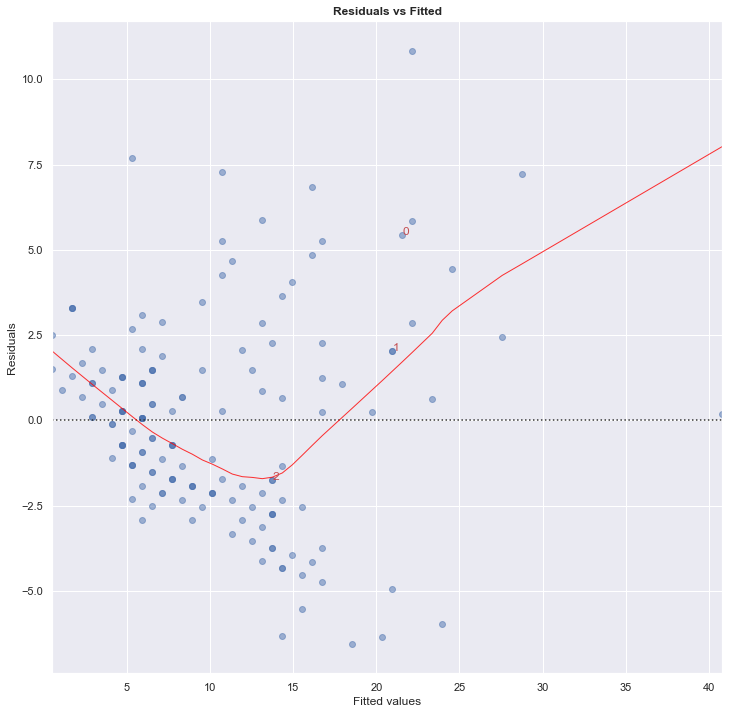

In [119]:
fit_diagnose.residual_plot()
plt.show()

For the distribution of the residuals to be correct, the horizontal red line should be as horizontal as possible

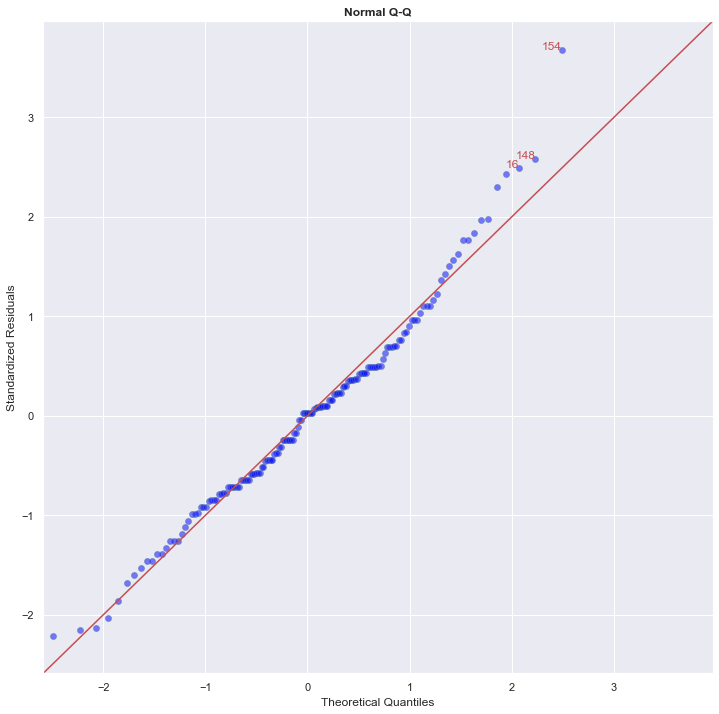

In [120]:
fit_diagnose.qq_plot()
plt.show()

The qq-plot shows that the distribution of the residuals is quite normal, although for the highest values, the points are further from the normal line.

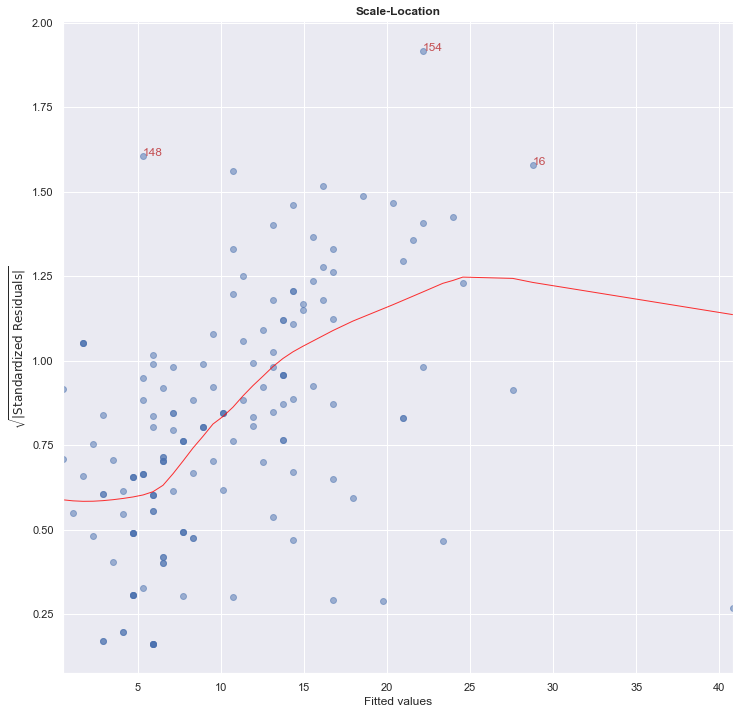

In [121]:
fit_diagnose.scale_location_plot()
plt.show()

Same as residual vs fitted